In [5]:
import yfinance as yf

ticker ='GOOG'
start = '2016-09-12'
end = '2023-09-13'
 

google_data = yf.download(tickers = ticker, start = start, end = end)
google_data.head()
google_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-06,137.014999,137.479996,134.690002,135.369995,135.369995,15814300
2023-09-07,134.600006,136.580002,133.960007,136.199997,136.199997,16976000
2023-09-08,135.869995,137.514999,135.869995,137.199997,137.199997,17810700
2023-09-11,137.380005,138.264008,136.550003,137.740005,137.740005,17180800
2023-09-12,137.130005,137.639999,135.929993,136.070007,136.070007,15212900


In [6]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-12,37.756500,38.514500,37.700001,38.451000,38.451000,26220000
2016-09-13,38.223999,38.311001,37.790001,37.984501,37.984501,27900000
2016-09-14,37.980499,38.383999,37.955502,38.124500,38.124500,21748000
2016-09-15,38.144501,38.689999,37.998001,38.588001,38.588001,26102000
2016-09-16,38.487499,38.487499,38.233002,38.444000,38.444000,40986000


# stock market prediction and forescasting using stacked LSTM

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
google_data1 = google_data.reset_index()['Close'] 

In [9]:
google_data1.shape



(1762,)

In [10]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-12,37.756500,38.514500,37.700001,38.451000,38.451000,26220000
2016-09-13,38.223999,38.311001,37.790001,37.984501,37.984501,27900000
2016-09-14,37.980499,38.383999,37.955502,38.124500,38.124500,21748000
2016-09-15,38.144501,38.689999,37.998001,38.588001,38.588001,26102000
2016-09-16,38.487499,38.487499,38.233002,38.444000,38.444000,40986000


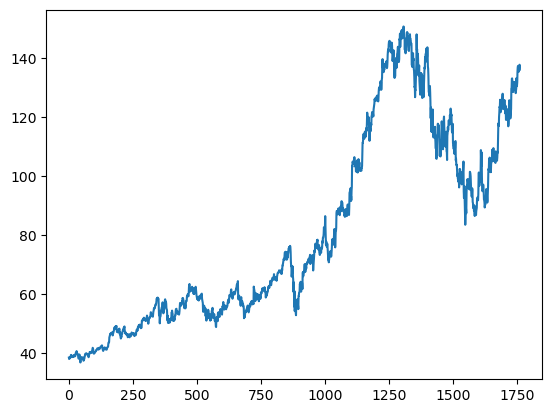

In [11]:
plt.plot(google_data1)

In [12]:
#we can see the increment of values in close at google_data1

In [13]:
google_data1

0        38.451000
1        37.984501
2        38.124500
3        38.588001
4        38.444000
           ...    
1757    135.369995
1758    136.199997
1759    137.199997
1760    137.740005
1761    136.070007
Name: Close, Length: 1762, dtype: float64

In [14]:
#LSTM(long short - term memory) used for deep learning also used for learn ,process,and classify sequential data.

In [15]:
#LSTM are sensitive to scale of data.so we apply minmax scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
google_data1 = scaler.fit_transform(np.array(google_data1).reshape(-1,1))


In [17]:
google_data1.shape

(1762, 1)

In [18]:
print(google_data1)

[[0.01445941]
 [0.0103639 ]
 [0.01159299]
 ...
 [0.88140114]
 [0.88614201]
 [0.87148069]]


In [19]:
#splitting dataset into train and test split

In [20]:
training_size = int(len(google_data1)*0.75)
test_size = len(google_data1)-training_size
train_data,test_data = google_data1[0:training_size,:],google_data1[training_size:len(google_data1),:1]

In [21]:
training_size,test_size

(1321, 441)

In [22]:
len(train_data)

1321

In [23]:
len(test_data)

441

In [24]:
#converting an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset)- time_step-1):
        a = dataset[i:(i+time_step),0] ###i = 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [25]:
#reshape into x=t, t+1,t+3 and y = t+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test , y_test = create_dataset(test_data , time_step)

In [26]:
print(x_train)

[[0.01445941 0.0103639  0.01159299 ... 0.0266494  0.02616875 0.02741317]
 [0.0103639  0.01159299 0.01566218 ... 0.02616875 0.02741317 0.02871253]
 [0.01159299 0.01566218 0.01439796 ... 0.02741317 0.02871253 0.02864668]
 ...
 [0.83647342 0.82930947 0.83439274 ... 0.92750973 0.92018784 0.93913792]
 [0.82930947 0.83439274 0.81164126 ... 0.92018784 0.93913792 0.92811108]
 [0.83439274 0.81164126 0.82786095 ... 0.93913792 0.92811108 0.93931341]]


In [27]:
print(x_test)

[[0.97714765 0.98214304 0.9648435  ... 0.6862078  0.70543872 0.71397657]
 [0.98214304 0.9648435  0.94962034 ... 0.70543872 0.71397657 0.75300467]
 [0.9648435  0.94962034 0.97067293 ... 0.71397657 0.75300467 0.70183485]
 ...
 [0.63786488 0.61117596 0.59976298 ... 0.8778895  0.8770994  0.86533511]
 [0.61117596 0.59976298 0.59888501 ... 0.8770994  0.86533511 0.8726219 ]
 [0.59976298 0.59888501 0.60661078 ... 0.86533511 0.8726219  0.88140114]]


In [28]:
print(x_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [29]:
#reshape input to be[samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [30]:
#creating the lSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras. layers import LSTM

In [31]:
model = Sequential()
model.add(LSTM(50,return_sequences =True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
20/20 [==============================] - 7s 140ms/step - loss: 0.0236 - val_loss: 0.0157
Epoch 2/100
20/20 [==============================] - 2s 93ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 3/100
20/20 [==============================] - 2s 96ms/step - loss: 9.4290e-04 - val_loss: 0.0057
Epoch 4/100
20/20 [==============================] - 2s 93ms/step - loss: 9.2373e-04 - val_loss: 0.0036
Epoch 5/100
20/20 [==============================] - 2s 93ms/step - loss: 8.1120e-04 - val_loss: 0.0048
Epoch 6/100
20/20 [==============================] - 2s 94ms/step - loss: 8.2415e-04 - val_loss: 0.0041
Epoch 7/100
20/20 [==============================] - 2s 100ms/step - loss: 7.8151e-04 - val_loss: 0.0034
Epoch 8/100
20/20 [==============================] - 2s 104ms/step - loss: 7.7995e-04 - val_loss: 0.0034
Epoch 9/100
20/20 [==============================] - 2s 120ms/step - loss: 8.6218e-04 - val_loss: 0.0033
Epoch 10/100
20/20 [==============================] - 2s 118ms/step 

In [34]:
import tensorflow as tf

In [37]:
tf.__version__

'2.13.0'

# lets do the prediction and check performance metrics

In [38]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 18ms/step


In [39]:
##transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [40]:
##calculate RMSE(root mean square error)performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

77.297372584218

In [41]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

112.68427967925999

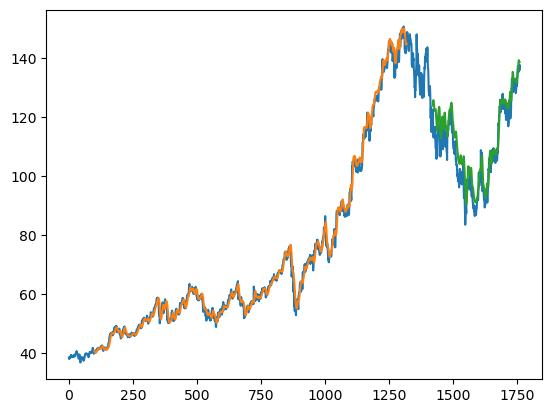

In [43]:
###plotting
#shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(google_data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test prediction  for plotting
testPredictPlot = np.empty_like(google_data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(google_data1)-1, :] = test_predict
#plot baseline and prediction
plt.plot(scaler.inverse_transform(google_data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [45]:
len(test_data)

441

In [46]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [50]:
temp_input

[0.6066107845299011,
 0.6066985957439626,
 0.6143364968590244,
 0.595285549207904,
 0.5938808377042465,
 0.6282955327602139,
 0.6269786324706177,
 0.6225011982781232,
 0.60731314028173,
 0.6085422293572648,
 0.6005530833859575,
 0.609376201459689,
 0.6271541879184094,
 0.6245204543195482,
 0.6626223496217888,
 0.7031824900554301,
 0.7121372914600882,
 0.7037092233791363,
 0.7311882391112084,
 0.7433914526131572,
 0.761301055422473,
 0.7589306884854649,
 0.7819323370053736,
 0.7592818663613793,
 0.7447960971364836,
 0.7685878456419516,
 0.7780694473506465,
 0.7711338350070825,
 0.7599842221132079,
 0.7687634680700742,
 0.7763136249514057,
 0.7886045157067537,
 0.7998420067950206,
 0.7562091436725421,
 0.753838709755203,
 0.7555945991347749,
 0.7685878456419516,
 0.7692902013937802,
 0.7688512123038046,
 0.7812299812535449,
 0.7660418562768206,
 0.7641982226635183,
 0.7414600077857937,
 0.7643738450916412,
 0.7569114324440399,
 0.7224089931543421,
 0.7217067043828446,
 0.7398797408343444

In [52]:
#demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input{}". format(i,x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input,verbose = 0)
        print("{} day output{}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
        
print(lst_output)     

[0.8946056]
101
1 day input[0.6066986  0.6143365  0.59528555 0.59388084 0.62829553 0.62697863
 0.6225012  0.60731314 0.60854223 0.60055308 0.6093762  0.62715419
 0.62452045 0.66262235 0.70318249 0.71213729 0.70370922 0.73118824
 0.74339145 0.76130106 0.75893069 0.78193234 0.75928187 0.7447961
 0.76858785 0.77806945 0.77113384 0.75998422 0.76876347 0.77631362
 0.78860452 0.79984201 0.75620914 0.75383871 0.7555946  0.76858785
 0.7692902  0.76885121 0.78122998 0.76604186 0.76419822 0.74146001
 0.76437385 0.75691143 0.72240899 0.7217067  0.73987974 0.73048595
 0.73891402 0.7353145  0.75348753 0.73856284 0.73162723 0.70291912
 0.71029366 0.72706205 0.77280191 0.78043981 0.7748211  0.76621748
 0.75480443 0.72627188 0.73311968 0.7469031  0.75489224 0.81520569
 0.81704925 0.84461608 0.84549406 0.83478337 0.80625082 0.80739216
 0.80537284 0.83522236 0.83434438 0.81950743 0.8200343  0.81968305
 0.83425663 0.82056103 0.81037708 0.82222911 0.80159783 0.80879674
 0.81546905 0.84637204 0.82187787 0.

In [54]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [55]:
import matplotlib.pyplot as plt

In [56]:
len(google_data1)

1762

In [57]:
google_data3 = google_data1 . tolist()
google_data3.extend(lst_output)

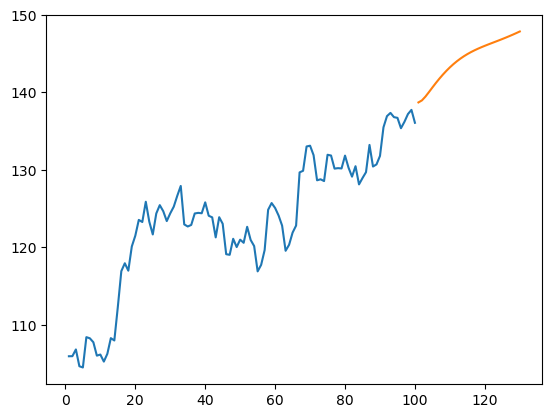

In [60]:
plt.plot(day_new,scaler.inverse_transform(google_data1[1662:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

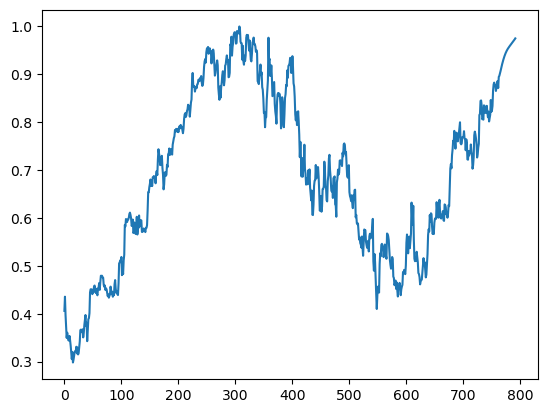

In [61]:
plt.plot(google_data3[1000:])

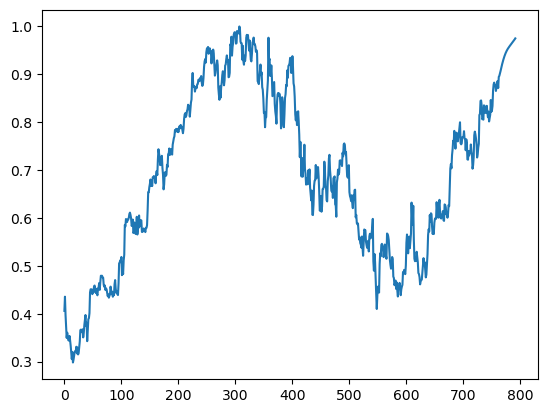

In [62]:
google_data3 = google_data1.tolist()
google_data3.extend(lst_output)
plt.plot(google_data3[1000:])

# Thankyou